# Convolutional Neural Network Training
To create our CNN newtwork we first need to import the data. The Images are stored as 100 .png files in a directory for each genre. We will need to load these images and possibly randomize the order of them so they aren't seperated by genre.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras_preprocessing.image import load_img, img_to_array
import tensorflow as tf
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [3]:
data_path = 'Data/images_original/'

image_paths = []
labels_words = []

for class_dir in os.listdir(data_path):
    class_path = os.path.join(data_path ,class_dir)
    if os.path.isdir(class_path):
        for img in os.listdir(class_path):
            image_paths.append(os.path.join(class_path, img))
            labels_words.append(class_dir)


print(len(image_paths))
print(labels_words)
encoder = LabelEncoder()
labels = encoder.fit_transform(labels_words)
print(labels[::100])

images = [
    img_to_array(load_img(img, target_size=(288, 432))) / 255 for img in image_paths
]

999
['pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal'

# Missing Jazz
It looks like there are only 99 files in the Jazz directory. I checked the online data and that is also missing one image. It shouldn't be a big issues but we just wanted to note the difference.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=101)

X_train = np.array(X_train).reshape(-1, 288, 432, 3)
X_test = np.array(X_test).reshape(-1, 288, 432, 3)

y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

(-0.5, 431.5, 287.5, -0.5)

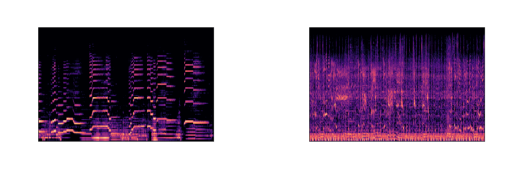

In [7]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.imshow(X_train[0])
ax.axis("off")

ax2.imshow(X_train[8])
ax2.axis("off")

# Class CNN

In [8]:
conv_network = tf.keras.Sequential()
conv_network.add(
    tf.keras.layers.Conv2D(
        32,
        (3, 3),
        strides=(2, 2),
        activation="relu",
        input_shape=(288, 432, 3),
        padding="same",
    )
)

conv_network.add(
    tf.keras.layers.Conv2D(
        32, (3, 3), strides=(2, 2), activation="relu", padding="same"
    )
)

conv_network.add(
    tf.keras.layers.Conv2D(
        32, (3, 3), strides=(2, 2), activation="relu", padding="same"
    )
)

conv_network.add(tf.keras.layers.Flatten())

conv_network.add(tf.keras.layers.Dense(100, activation="relu"))
conv_network.add(tf.keras.layers.Dense(10, activation="softmax"))

conv_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 144, 216, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 108, 32)       9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 54, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 62208)             0         
                                                                 
 dense (Dense)               (None, 100)               6220900   
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 6,241,302
Trainable params: 6,241,302
Non-

# Training

In [9]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()
opt = tf.keras.optimizers.Adam()

conv_network.compile(loss=loss_fn, optimizer=opt, metrics=["accuracy"])
history_conv = conv_network.fit(
    X_train,
    y_train_one_hot,
    validation_data=(X_test, y_test_one_hot),
    epochs=10,
    verbose=1,
)

Epoch 1/10


2024-04-08 14:55:53.961412: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


25/25 [==============================] - 3s 129ms/step - loss: 2.2853 - accuracy: 0.1539 - val_loss: 2.0899 - val_accuracy: 0.2200
Epoch 2/10
25/25 [==============================] - 3s 128ms/step - loss: 1.9805 - accuracy: 0.2954 - val_loss: 1.8423 - val_accuracy: 0.3400
Epoch 3/10
25/25 [==============================] - 3s 137ms/step - loss: 1.6439 - accuracy: 0.4631 - val_loss: 1.7469 - val_accuracy: 0.3700
Epoch 4/10
25/25 [==============================] - 3s 140ms/step - loss: 1.2640 - accuracy: 0.5820 - val_loss: 1.5677 - val_accuracy: 0.4250
Epoch 5/10
25/25 [==============================] - 3s 133ms/step - loss: 0.7125 - accuracy: 0.8023 - val_loss: 1.6181 - val_accuracy: 0.4700
Epoch 6/10
25/25 [==============================] - 3s 128ms/step - loss: 0.3240 - accuracy: 0.9136 - val_loss: 1.4849 - val_accuracy: 0.5400
Epoch 7/10
25/25 [==============================] - 3s 128ms/step - loss: 0.0695 - accuracy: 0.9862 - val_loss: 1.8147 - val_accuracy: 0.5300
Epoch 8/10
25/25 

# Testing

In [10]:
print(
    "Final loss: {}, test accuracy: {}".format(
        *map(
            lambda x: round(x, 4),
            conv_network.evaluate(X_test, y_test_one_hot, verbose=0),
        )
    )
)

Final loss: 2.0458, test accuracy: 0.505


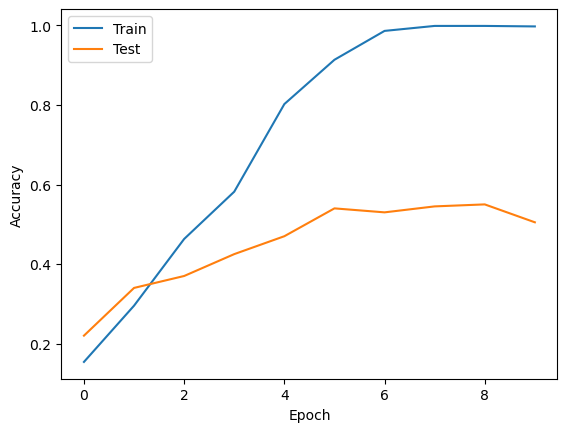

In [11]:
plt.plot(history_conv.history["accuracy"], label="Train")
plt.plot(history_conv.history["val_accuracy"], label="Test")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()


# Class Example CNN
Creating the model in the same way as we did in class we see a very high training accuracy at 99.98% but we only see a trainig accuracy of 50%. This means we are likely overfitting the data. We will need to change the layers of the model to hopefully get rid of overfitting.

# Improved Model #1
In this model we change it to use filters size 5, 5 as well as downsampling the data after each layer. We also remove the stepping.

In [17]:
conv_network = tf.keras.Sequential()
conv_network.add(
    tf.keras.layers.Conv2D(
        32,
        (5, 5),
        
        activation="relu",
        input_shape=(288, 432, 3),
        padding="same",
    )
)
conv_network.add(tf.keras.layers.MaxPooling2D((2, 2)))

conv_network.add(
    tf.keras.layers.Conv2D(
        64, (5, 5),
        
        activation="relu",
        padding="same"
    )
)
conv_network.add(tf.keras.layers.MaxPooling2D((2, 2)))

conv_network.add(
    tf.keras.layers.Conv2D(
        128, (5, 5),  activation="relu", padding="same"
    )
)
conv_network.add(tf.keras.layers.MaxPooling2D((2, 2)))

# conv_network.add(
#     tf.keras.layers.Conv2D(
#         256, (5, 5), strides=(2, 2), activation="relu", padding="same"
#     )
# )
# conv_network.add(tf.keras.layers.MaxPooling2D((2, 2)))

conv_network.add(tf.keras.layers.Flatten())

conv_network.add(tf.keras.layers.Dense(64, activation="relu"))
conv_network.add(tf.keras.layers.Dense(10, activation="softmax"))

conv_network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 288, 432, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 144, 216, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 144, 216, 64)      51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 72, 108, 64)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 108, 128)      204928    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 54, 128)     

# Training
We alos have increased the number of epochs and added the functionality to stop training early if the validation loss is not improveing to prevent overfitting.

In [18]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()
opt = tf.keras.optimizers.Adam()

early_stop_crit = EarlyStopping(monitor="val_loss", min_delta=0, patience=5)


conv_network.compile(loss=loss_fn, optimizer=opt, metrics=["accuracy"])
history_conv = conv_network.fit(
    X_train,
    y_train_one_hot,
    validation_data=(X_test, y_test_one_hot),
    epochs=20,
    verbose=1,
    callbacks=early_stop_crit,
    batch_size=100
)

Epoch 1/20
8/8 [==============================] - 55s 7s/step - loss: 4.2866 - accuracy: 0.1202 - val_loss: 2.3268 - val_accuracy: 0.0950
Epoch 2/20
8/8 [==============================] - 54s 7s/step - loss: 2.2854 - accuracy: 0.1352 - val_loss: 2.2816 - val_accuracy: 0.0850
Epoch 3/20
8/8 [==============================] - 56s 7s/step - loss: 2.2005 - accuracy: 0.2078 - val_loss: 2.1724 - val_accuracy: 0.2250
Epoch 4/20
8/8 [==============================] - 53s 7s/step - loss: 1.9664 - accuracy: 0.2929 - val_loss: 1.9477 - val_accuracy: 0.3450
Epoch 5/20
8/8 [==============================] - 53s 7s/step - loss: 1.7309 - accuracy: 0.3942 - val_loss: 1.7350 - val_accuracy: 0.3750
Epoch 6/20
8/8 [==============================] - 53s 7s/step - loss: 1.5224 - accuracy: 0.4894 - val_loss: 1.5648 - val_accuracy: 0.4200
Epoch 7/20
8/8 [==============================] - 55s 7s/step - loss: 1.3230 - accuracy: 0.5482 - val_loss: 1.4144 - val_accuracy: 0.5000
Epoch 8/20
8/8 [==================

In [19]:
print(
    "Final loss: {}, test accuracy: {}".format(
        *map(
            lambda x: round(x, 4),
            conv_network.evaluate(X_test, y_test_one_hot, verbose=0),
        )
    )
)

Final loss: 1.4714, test accuracy: 0.59


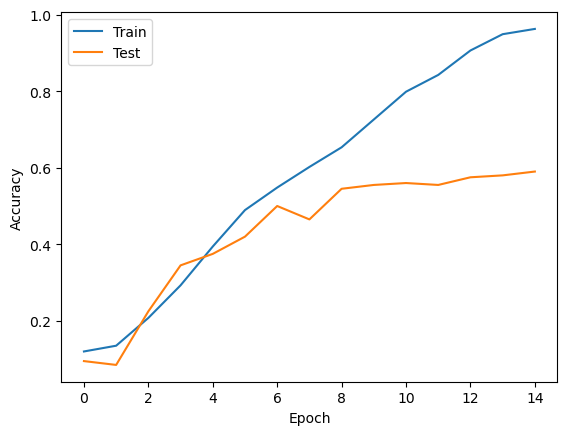

In [20]:
plt.plot(history_conv.history["accuracy"], label="Train")
plt.plot(history_conv.history["val_accuracy"], label="Test")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Results
Running this model took a lot longer than the model derived from the class example. It took around 13 minutes and stoped early because the valdiation loss was not seeing improvement for the last 5 epochs. This is higher accuracy than what we had previously at 59% but more improvement is needed.

# Improved Model #2

In [8]:
from tensorflow.keras.applications import VGG16

vgg16_model = VGG16(weights="imagenet", include_top=False, input_shape=(288, 432, 3))

for layer in vgg16_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 8s 0us/step


In [17]:
conv_network = tf.keras.Sequential()
conv_network.add(vgg16_model)
conv_network.add(tf.keras.layers.Flatten())

conv_network.add(
    tf.keras.layers.Conv2D(
        32,
        (3, 3),
        strides=(2, 2),
        activation="relu",
        padding="same",
    )
)

conv_network.add(
    tf.keras.layers.Conv2D(
        32, (3, 3), strides=(2, 2), activation="relu", padding="same"
    )
)

conv_network.add(
    tf.keras.layers.Conv2D(
        32, (3, 3), strides=(2, 2), activation="relu", padding="same"
    )
)

conv_network.add(tf.keras.layers.Flatten())

conv_network.add(tf.keras.layers.Dense(100, activation="relu"))
conv_network.add(tf.keras.layers.Dense(10, activation="softmax"))

conv_network.summary()

ValueError: Input 0 of layer "conv2d_3" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 59904)

In [12]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()
opt = tf.keras.optimizers.Adam()

early_stop_crit = EarlyStopping(monitor="val_loss", min_delta=0, patience=5)


conv_network.compile(loss=loss_fn, optimizer=opt, metrics=["accuracy"])
history_conv = conv_network.fit(
    X_train,
    y_train_one_hot,
    validation_data=(X_test, y_test_one_hot),
    epochs=10,
    verbose=1,
    callbacks=early_stop_crit,
    batch_size=100,
)

Epoch 1/10
8/8 [==============================] - 147s 19s/step - loss: 6.2064 - accuracy: 0.1777 - val_loss: 3.2251 - val_accuracy: 0.2250
Epoch 2/10
8/8 [==============================] - 147s 19s/step - loss: 2.8957 - accuracy: 0.2628 - val_loss: 2.3713 - val_accuracy: 0.3500
Epoch 3/10
8/8 [==============================] - 149s 19s/step - loss: 2.0665 - accuracy: 0.3680 - val_loss: 1.9124 - val_accuracy: 0.3550
Epoch 4/10
8/8 [==============================] - 152s 19s/step - loss: 1.6459 - accuracy: 0.3967 - val_loss: 1.6039 - val_accuracy: 0.4450
Epoch 5/10
8/8 [==============================] - 143s 18s/step - loss: 1.3445 - accuracy: 0.6008 - val_loss: 1.5371 - val_accuracy: 0.5100
Epoch 6/10
8/8 [==============================] - 144s 18s/step - loss: 1.1948 - accuracy: 0.6571 - val_loss: 1.3624 - val_accuracy: 0.6050
Epoch 7/10
8/8 [==============================] - 145s 19s/step - loss: 1.0501 - accuracy: 0.7272 - val_loss: 1.3233 - val_accuracy: 0.6200
Epoch 8/10
8/8 [====

In [13]:
print(
    "Final loss: {}, test accuracy: {}".format(
        *map(
            lambda x: round(x, 4),
            conv_network.evaluate(X_test, y_test_one_hot, verbose=0),
        )
    )
)

Final loss: 1.195, test accuracy: 0.61


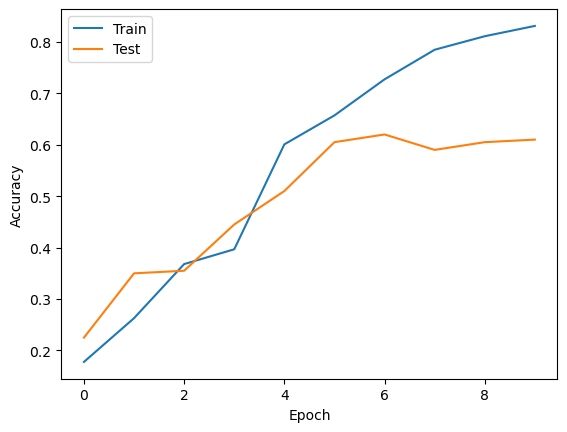

In [14]:
plt.plot(history_conv.history["accuracy"], label="Train")
plt.plot(history_conv.history["val_accuracy"], label="Test")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Results
Using a pretrained image recognition model we don't achieve much better accuracy

In [15]:
conv_network = tf.keras.Sequential()
conv_network.add(vgg16_model)
conv_network.add(tf.keras.layers.Flatten())

conv_network.add(
    tf.keras.layers.Conv2D(
        32,
        (3, 3),
        strides=(2, 2),
        activation="relu",
        input_shape=(288, 432, 3),
        padding="same",
    )
)

conv_network.add(
    tf.keras.layers.Conv2D(
        32, (3, 3), strides=(2, 2), activation="relu", padding="same"
    )
)

conv_network.add(
    tf.keras.layers.Conv2D(
        32, (3, 3), strides=(2, 2), activation="relu", padding="same"
    )
)

# conv_network.add(tf.keras.layers.Flatten())

conv_network.add(tf.keras.layers.Dense(100, activation="relu"))
conv_network.add(tf.keras.layers.Dense(10, activation="softmax"))

conv_network.summary()

ValueError: Input 0 of layer "conv2d_1" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 59904)

7/7 [==============================] - 0s 56ms/step


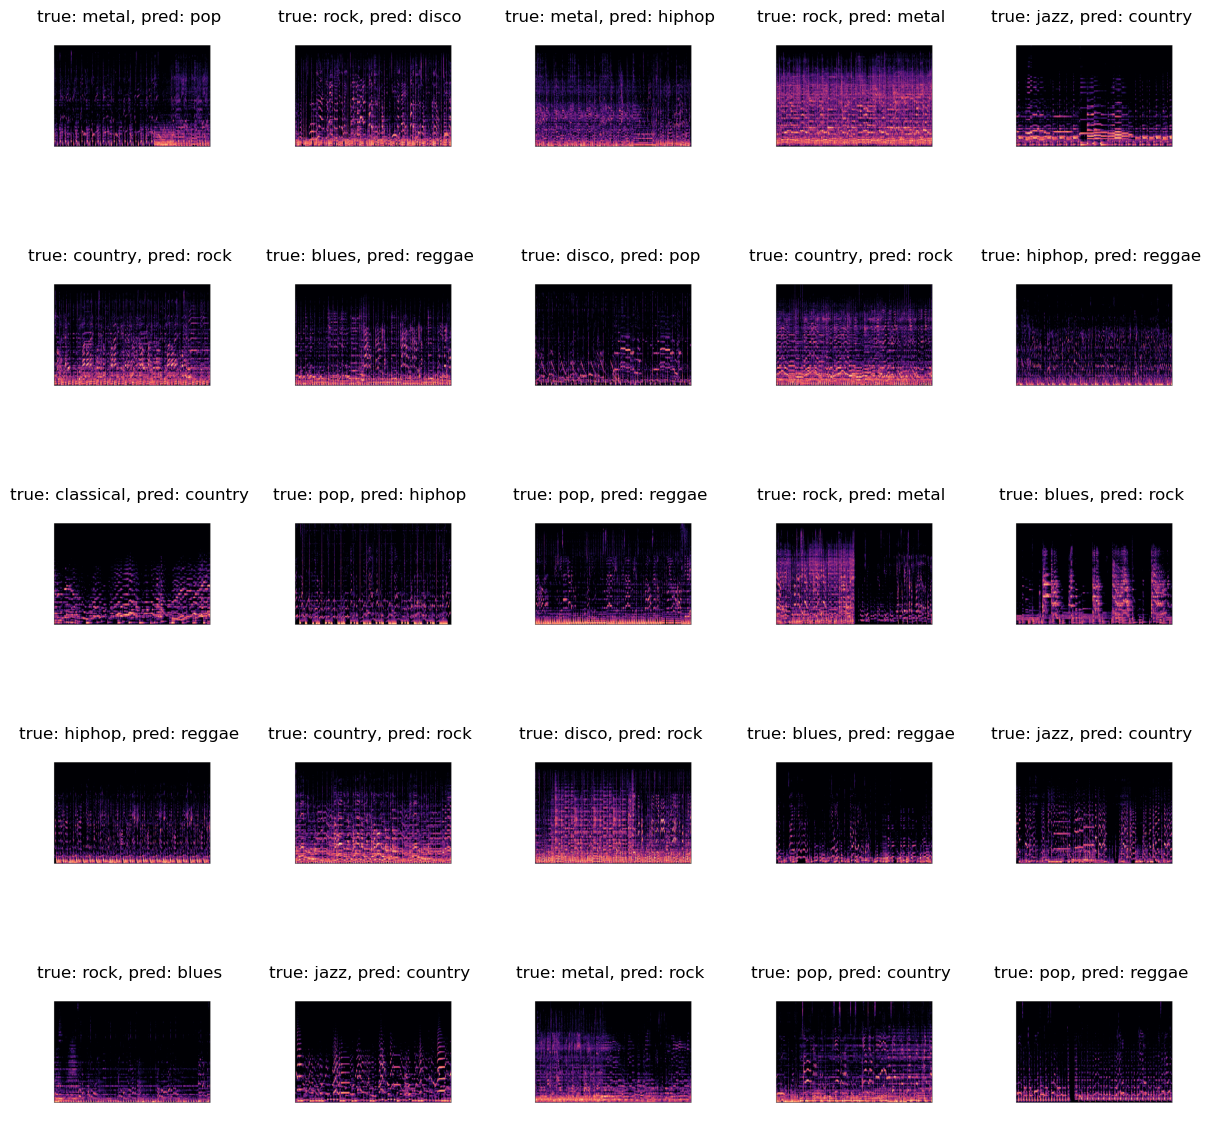

In [16]:
pred = np.argmax(conv_network.predict(X_test), axis=1)
incorrect_bool_array = y_test != pred

y_test_incorrect = y_test[incorrect_bool_array]
X_test_incorrect = X_test[incorrect_bool_array]
pred_incorrect = pred[incorrect_bool_array]

y_test_incorrect = encoder.inverse_transform(y_test_incorrect)
pred_incorrect = encoder.inverse_transform(pred_incorrect)

fig, axes = plt.subplots(5, 5, figsize=(15, 15))

for i in range(5):
    for j in range(5):
        axes[i, j].imshow(
            X_test_incorrect[i * 5 + j, :, :, :],
        )
        axes[i, j].set_title(
            "true: {}, pred: {}".format(
                y_test_incorrect[i * 5 + j], pred_incorrect[i * 5 + j]
            )
        )
        axes[i, j].axis("off")